Libraries imported successfully!
OpenCV version: 4.12.0
NumPy version: 1.26.4
Pandas version: 2.2.3
Dataset paths defined!
Base Path: /kaggle/input/brain-tumor-mri-dataset
Training Path: /kaggle/input/brain-tumor-mri-dataset/Training
Testing Path: /kaggle/input/brain-tumor-mri-dataset/Testing
Checking Dataset Structure...

Base path exists: /kaggle/input/brain-tumor-mri-dataset

Training Directories:
   glioma      : 1321 images
   meningioma  : 1339 images
   notumor     : 1595 images
   pituitary   : 1457 images

Testing Directories:
   glioma      :  300 images
   meningioma  :  306 images
   notumor     :  405 images
   pituitary   :  300 images
DATASET SUMMARY
            Training  Testing  Total
glioma          1321      300   1621
meningioma      1339      306   1645
notumor         1595      405   2000
pituitary       1457      300   1757
Total           5712     1311   7023

Class Distribution (Training Set):
   glioma      : 1321 (23.13%)
   meningioma  : 1339 (23.44%)
   not

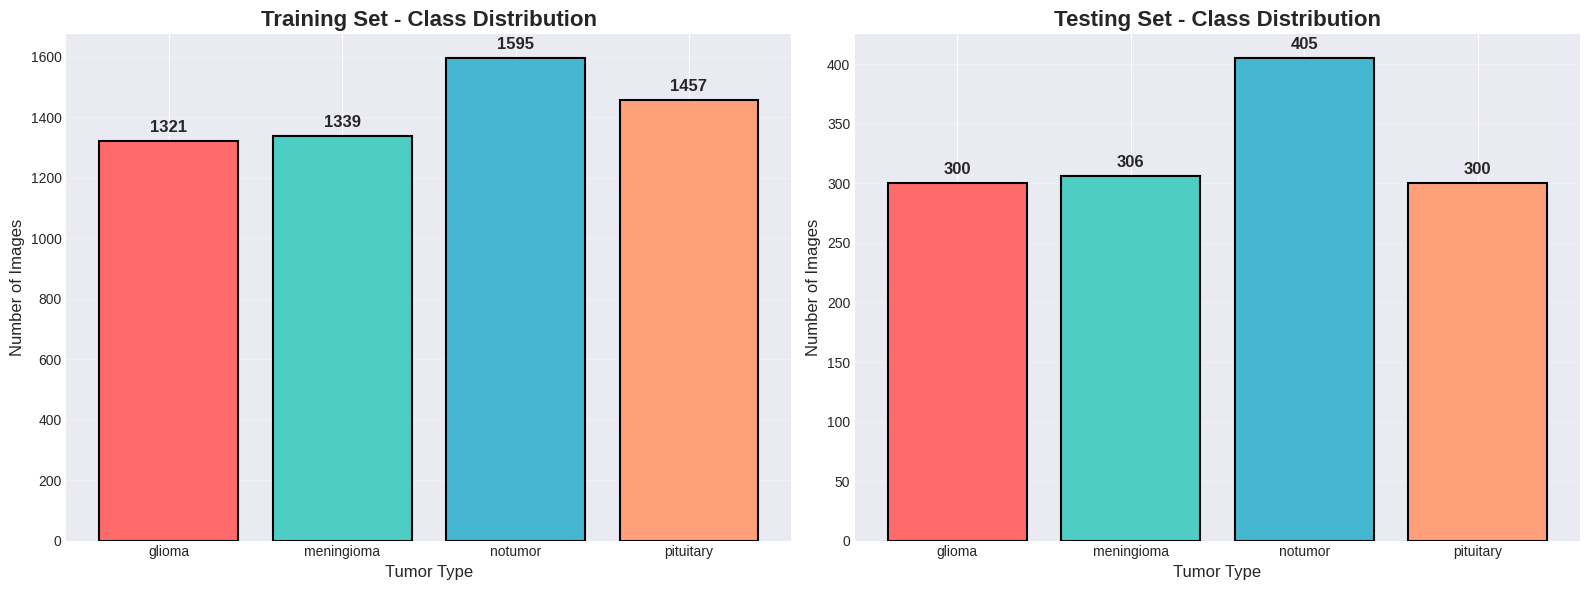

Class distribution visualized!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"OpenCV version: {cv2.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

BASE_PATH = '/kaggle/input/brain-tumor-mri-dataset'

TRAIN_PATH = os.path.join(BASE_PATH, 'Training')
train_glioma_path = os.path.join(TRAIN_PATH, 'glioma')
train_meningioma_path = os.path.join(TRAIN_PATH, 'meningioma')
train_notumor_path = os.path.join(TRAIN_PATH, 'notumor')
train_pituitary_path = os.path.join(TRAIN_PATH, 'pituitary')

TEST_PATH = os.path.join(BASE_PATH, 'Testing')
test_glioma_path = os.path.join(TEST_PATH, 'glioma')
test_meningioma_path = os.path.join(TEST_PATH, 'meningioma')
test_notumor_path = os.path.join(TEST_PATH, 'notumor')
test_pituitary_path = os.path.join(TEST_PATH, 'pituitary')

CLASS_NAMES = ['glioma', 'meningioma', 'notumor', 'pituitary']

print("Dataset paths defined!")
print(f"Base Path: {BASE_PATH}")
print(f"Training Path: {TRAIN_PATH}")
print(f"Testing Path: {TEST_PATH}")

def check_dataset_structure():
    print("Checking Dataset Structure...\n")
        
    if os.path.exists(BASE_PATH):
        print(f"Base path exists: {BASE_PATH}")
    else:
        print(f"Base path NOT found: {BASE_PATH}")
        return
        
    print("\nTraining Directories:")
    train_paths = {
        'glioma': train_glioma_path,
        'meningioma': train_meningioma_path,
        'notumor': train_notumor_path,
        'pituitary': train_pituitary_path
    }
        
    for class_name, path in train_paths.items():
        if os.path.exists(path):
            count = len(os.listdir(path))
            print(f"   {class_name:12s}: {count:4d} images")
        else:
            print(f"   {class_name:12s}: NOT FOUND")
        
    print("\nTesting Directories:")
    test_paths = {
        'glioma': test_glioma_path,
        'meningioma': test_meningioma_path,
        'notumor': test_notumor_path,
        'pituitary': test_pituitary_path
    }
        
    for class_name, path in test_paths.items():
        if os.path.exists(path):
            count = len(os.listdir(path))
            print(f"   {class_name:12s}: {count:4d} images")
        else:
            print(f"   {class_name:12s}: NOT FOUND")

check_dataset_structure()

def count_images_per_class():        
    train_counts = {}
    test_counts = {}
        
    for class_name in CLASS_NAMES:
        train_class_path = os.path.join(TRAIN_PATH, class_name)
        if os.path.exists(train_class_path):
            train_counts[class_name] = len([f for f in os.listdir(train_class_path)
                                            if f.endswith(('.jpg', '.jpeg', '.png'))])
        else:
            train_counts[class_name] = 0
        
    for class_name in CLASS_NAMES:
        test_class_path = os.path.join(TEST_PATH, class_name)
        if os.path.exists(test_class_path):
            test_counts[class_name] = len([f for f in os.listdir(test_class_path)
                                           if f.endswith(('.jpg', '.jpeg', '.png'))])
        else:
            test_counts[class_name] = 0
            
    return train_counts, test_counts

train_counts, test_counts = count_images_per_class()

summary_df = pd.DataFrame({
    'Training': train_counts,
    'Testing': test_counts
})
summary_df['Total'] = summary_df['Training'] + summary_df['Testing']
summary_df.loc['Total'] = summary_df.sum()

print("DATASET SUMMARY")
print(summary_df)

print("\nClass Distribution (Training Set):")
total_train = summary_df.loc['Total', 'Training']
for class_name in CLASS_NAMES:
    count = train_counts[class_name]
    percentage = (count / total_train) * 100
    print(f"   {class_name:12s}: {count:4d} ({percentage:5.2f}%)")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(train_counts.keys(), train_counts.values(), 
             color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], 
             edgecolor='black', linewidth=1.5)
axes[0].set_title('Training Set - Class Distribution', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Tumor Type', fontsize=12)
axes[0].set_ylabel('Number of Images', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

for i, (class_name, count) in enumerate(train_counts.items()):
    axes[0].text(i, count + 20, str(count), ha='center', va='bottom', 
                 fontsize=12, fontweight='bold')

axes[1].bar(test_counts.keys(), test_counts.values(), 
             color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], 
             edgecolor='black', linewidth=1.5)
axes[1].set_title('Testing Set - Class Distribution', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Tumor Type', fontsize=12)
axes[1].set_ylabel('Number of Images', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

for i, (class_name, count) in enumerate(test_counts.items()):
    axes[1].text(i, count + 5, str(count), ha='center', va='bottom', 
                 fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Class distribution visualized!")


CLASS IMBALANCE ANALYSIS - TRAINING SET
Total images: 5712
Maximum class size: 1595
Minimum class size: 1321
Imbalance Ratio: 1.21:1
Dataset is BALANCED

Suggested Class Weights:
   glioma      : 1.0810
   meningioma  : 1.0665
   notumor     : 0.8953
   pituitary   : 0.9801

CLASS IMBALANCE ANALYSIS - TESTING SET
Total images: 1311
Maximum class size: 405
Minimum class size: 300
Imbalance Ratio: 1.35:1
Dataset is BALANCED

Suggested Class Weights:
   glioma      : 1.0925
   meningioma  : 1.0711
   notumor     : 0.8093
   pituitary   : 1.0925


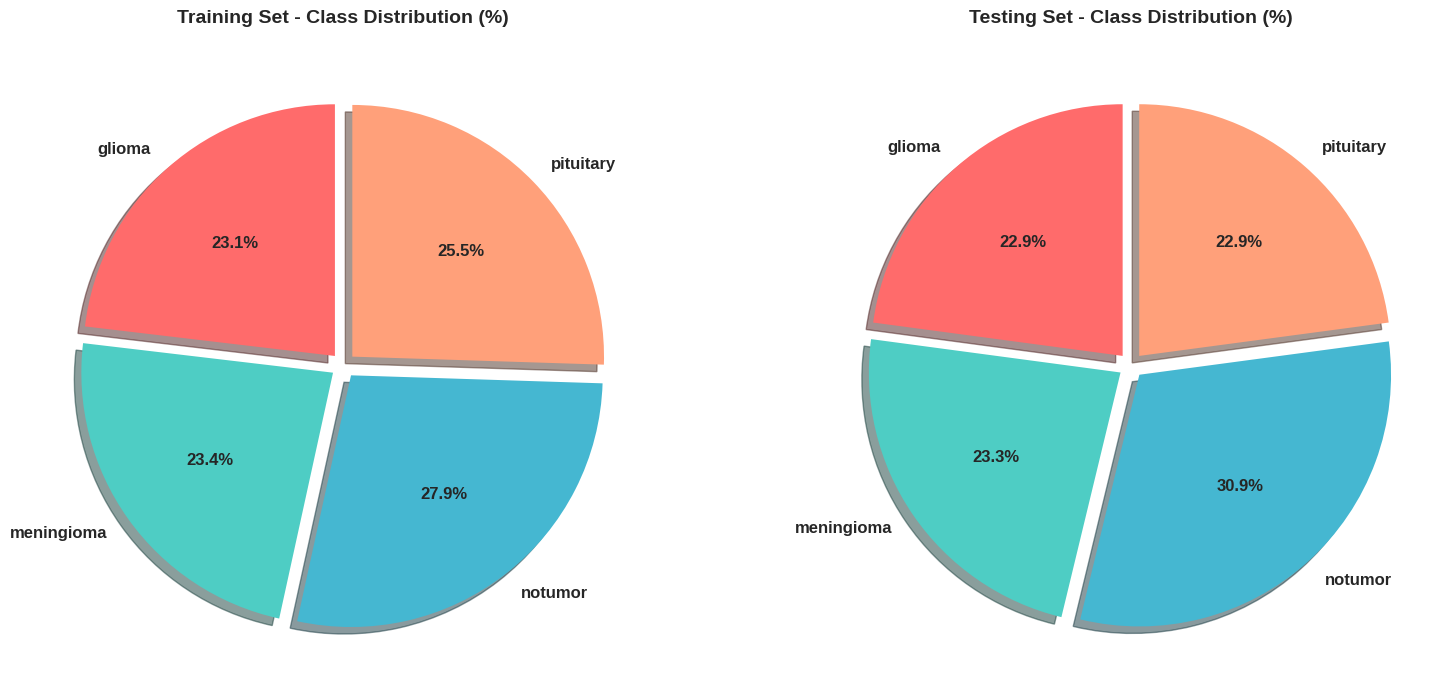

Pie charts created!

IMAGE DIMENSIONS ANALYSIS

GLIOMA:
  Width:  min= 512, max= 512, mean= 512.0, std=   0.0
  Height: min= 512, max= 512, mean= 512.0, std=   0.0
  Channels: {3}

MENINGIOMA:
  Width:  min= 201, max=1275, mean= 508.7, std= 101.9
  Height: min= 214, max=1427, mean= 513.0, std= 117.3
  Channels: {3}

NOTUMOR:
  Width:  min= 150, max=1920, mean= 326.6, std= 216.1
  Height: min= 168, max=1080, mean= 330.9, std= 172.5
  Channels: {3}

PITUITARY:
  Width:  min= 256, max= 512, mean= 501.3, std=  50.3
  Height: min= 256, max= 512, mean= 501.0, std=  50.6
  Channels: {3}


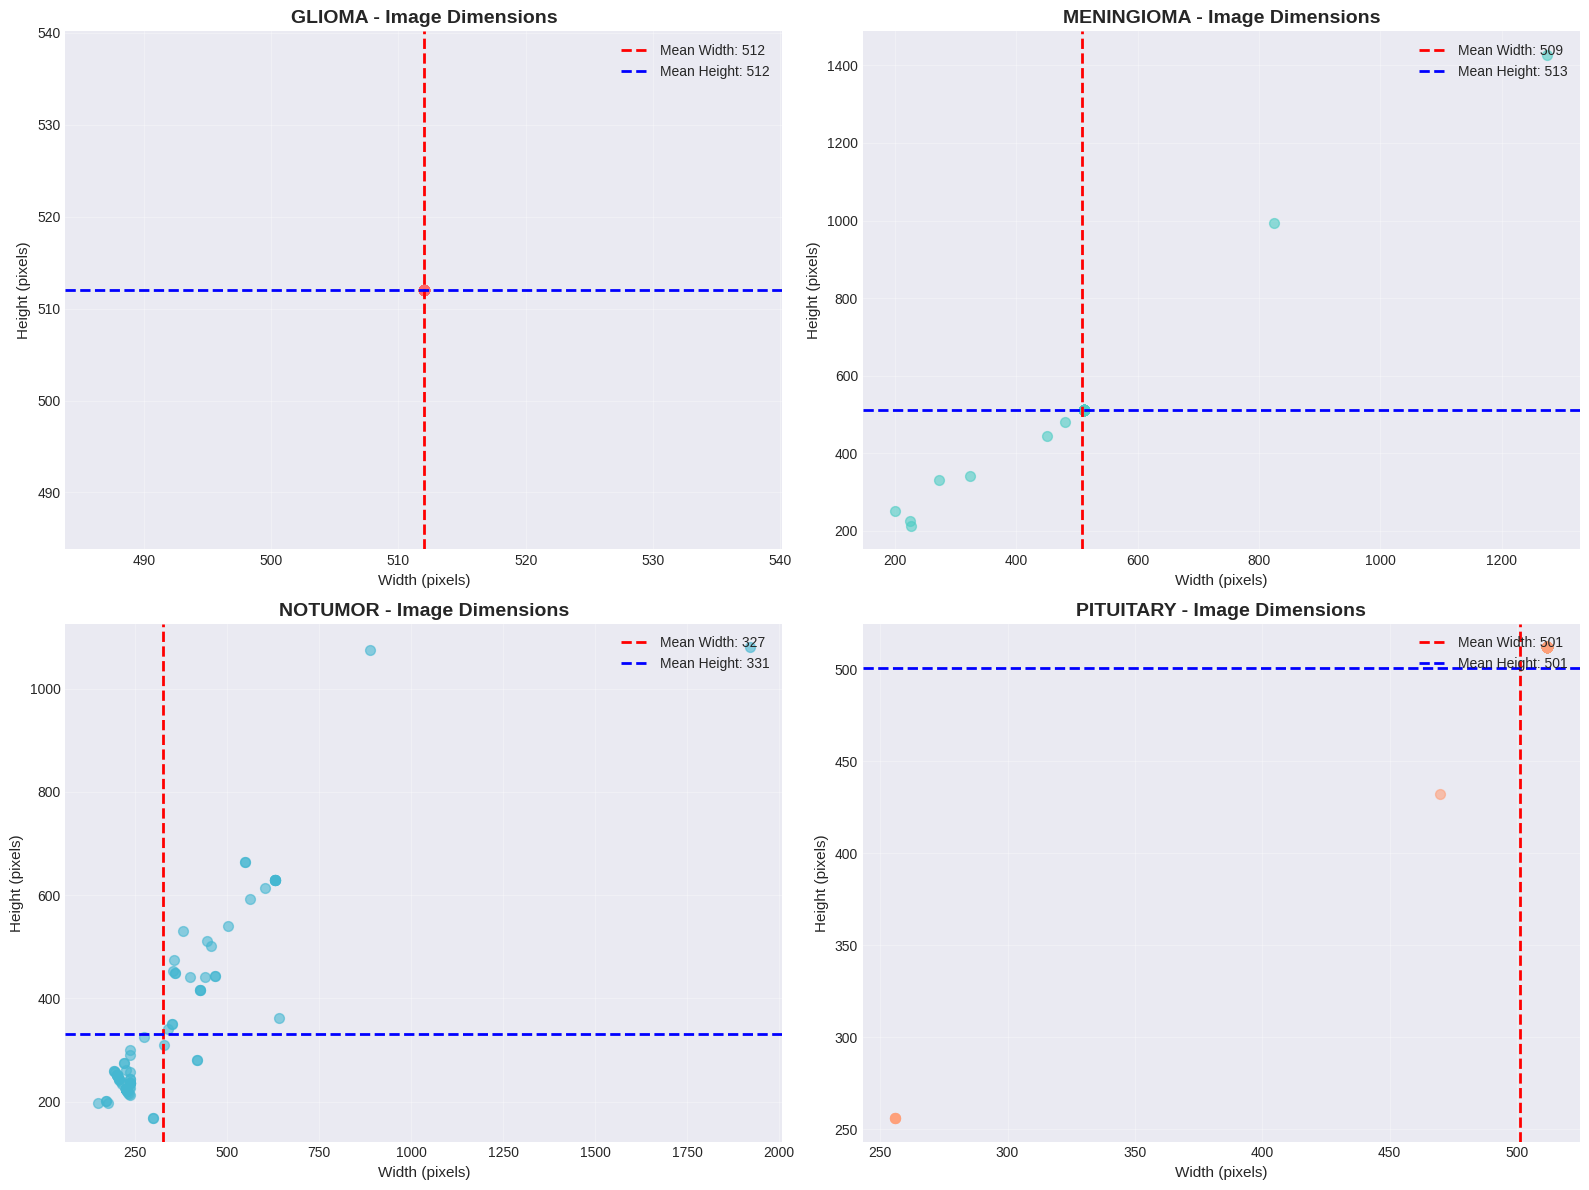

Image shape distribution visualized!


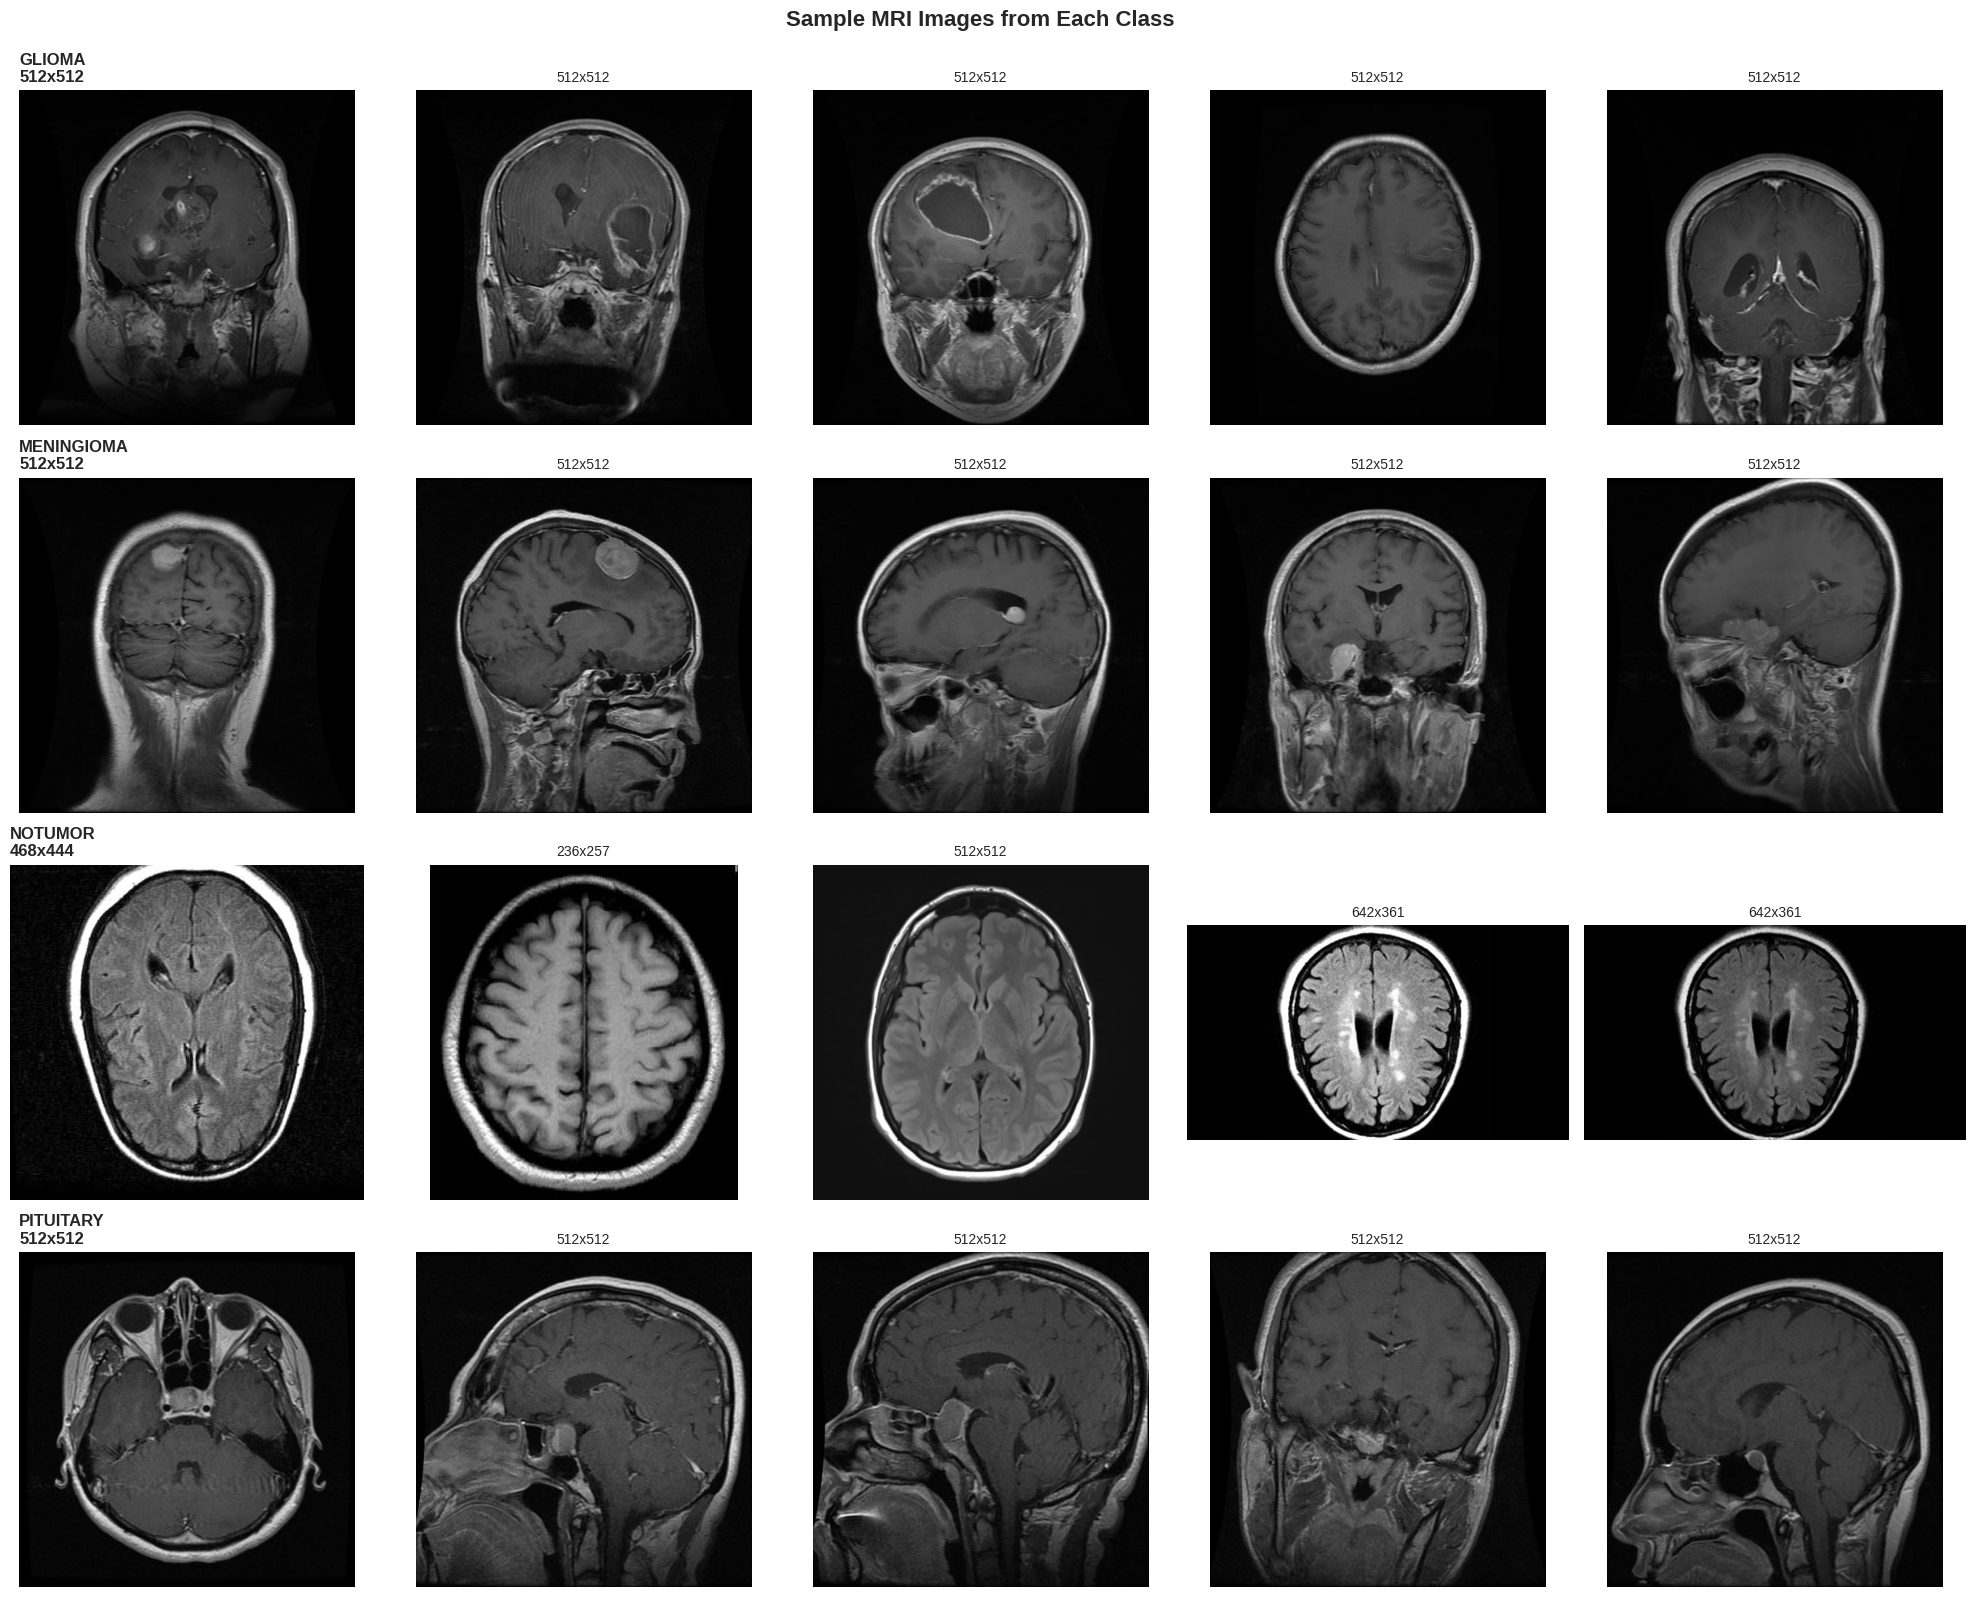

Sample images displayed!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

def analyze_class_imbalance(counts_dict, dataset_name):
    print(f"\nCLASS IMBALANCE ANALYSIS - {dataset_name}")
    counts = list(counts_dict.values())
    total = sum(counts)
    max_count = max(counts)
    min_count = min(counts)
    imbalance_ratio = max_count / min_count
        
    print(f"Total images: {total}")
    print(f"Maximum class size: {max_count}")
    print(f"Minimum class size: {min_count}")
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")
        
    if imbalance_ratio < 1.5:
        print("Dataset is BALANCED")
    elif imbalance_ratio < 3:
        print("Dataset is SLIGHTLY IMBALANCED")
    else:
        print("Dataset is HIGHLY IMBALANCED - Consider resampling/weighting")
        
    class_weights = {}
    for class_name, count in counts_dict.items():
        weight = total / (len(counts_dict) * count)
        class_weights[class_name] = weight
        
    print(f"\nSuggested Class Weights:")
    for class_name, weight in class_weights.items():
        print(f"   {class_name:12s}: {weight:.4f}")
        
    return class_weights

# Analyze training set
train_class_weights = analyze_class_imbalance(train_counts, "TRAINING SET")
# Analyze testing set
test_class_weights = analyze_class_imbalance(test_counts, "TESTING SET")


fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Training set pie chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
explode = (0.05, 0.05, 0.05, 0.05)
axes[0].pie(train_counts.values(), labels=train_counts.keys(), autopct='%1.1f%%',
           colors=colors, explode=explode, shadow=True, startangle=90,
           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Training Set - Class Distribution (%)',
                  fontsize=14, fontweight='bold', pad=20)

# Testing set pie chart
axes[1].pie(test_counts.values(), labels=test_counts.keys(), autopct='%1.1f%%',
           colors=colors, explode=explode, shadow=True, startangle=90,
           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Testing Set - Class Distribution (%)',
                  fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()
print("Pie charts created!")


def analyze_image_dimensions(num_samples=100):   
    print(f"\nIMAGE DIMENSIONS ANALYSIS")
        
    dimensions = {class_name: {'widths': [], 'heights': [], 'channels': []}
                   for class_name in CLASS_NAMES}
        
    for class_name in CLASS_NAMES:
        class_path = os.path.join(TRAIN_PATH, class_name)
        image_files = [f for f in os.listdir(class_path)
                       if f.endswith(('.jpg', '.jpeg', '.png'))]
                
        # Sample random images
        sample_files = np.random.choice(image_files,
                                        min(num_samples, len(image_files)),
                                        replace=False)
                
        for img_file in sample_files:
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)
                        
            if img is not None:
                h, w, c = img.shape
                dimensions[class_name]['heights'].append(h)
                dimensions[class_name]['widths'].append(w)
                dimensions[class_name]['channels'].append(c)
        
    # Print statistics
    for class_name in CLASS_NAMES:
        heights = dimensions[class_name]['heights']
        widths = dimensions[class_name]['widths']
        channels = dimensions[class_name]['channels']
                
        print(f"\n{class_name.upper()}:")
        print(f"  Width:  min={min(widths):4d}, max={max(widths):4d}, "
              f"mean={np.mean(widths):6.1f}, std={np.std(widths):6.1f}")
        print(f"  Height: min={min(heights):4d}, max={max(heights):4d}, "
              f"mean={np.mean(heights):6.1f}, std={np.std(heights):6.1f}")
        print(f"  Channels: {set(channels)}")
        
    return dimensions

dimensions_data = analyze_image_dimensions(num_samples=100)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, class_name in enumerate(CLASS_NAMES):
    widths = dimensions_data[class_name]['widths']
    heights = dimensions_data[class_name]['heights']
        
    # Scatter plot of width vs height
    axes[idx].scatter(widths, heights, alpha=0.6, s=50,
                      c=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'][idx])
    axes[idx].set_title(f'{class_name.upper()} - Image Dimensions',
                        fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Width (pixels)', fontsize=11)
    axes[idx].set_ylabel('Height (pixels)', fontsize=11)
    axes[idx].grid(alpha=0.3)
        
    # Add statistics text
    mean_w, mean_h = np.mean(widths), np.mean(heights)
    axes[idx].axvline(mean_w, color='red', linestyle='--', linewidth=2, label=f'Mean Width: {mean_w:.0f}')
    axes[idx].axhline(mean_h, color='blue', linestyle='--', linewidth=2, label=f'Mean Height: {mean_h:.0f}')
    axes[idx].legend(loc='upper right')

plt.tight_layout()
plt.show()
print("Image shape distribution visualized!")
def display_sample_images(num_samples=5):        
    fig, axes = plt.subplots(4, num_samples, figsize=(20, 16))
        
    for class_idx, class_name in enumerate(CLASS_NAMES):
        class_path = os.path.join(TRAIN_PATH, class_name)
        image_files = [f for f in os.listdir(class_path)
                       if f.endswith(('.jpg', '.jpeg', '.png'))]
                
        # Select random samples
        sample_files = np.random.choice(image_files, num_samples, replace=False)
                
        for img_idx, img_file in enumerate(sample_files):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        
            axes[class_idx, img_idx].imshow(img_rgb)
            axes[class_idx, img_idx].axis('off')
                        
            if img_idx == 0:
                axes[class_idx, img_idx].set_title(
                    f'{class_name.upper()}\n{img_rgb.shape[1]}x{img_rgb.shape[0]}',
                    fontsize=12, fontweight='bold', loc='left'
                )
            else:
                axes[class_idx, img_idx].set_title(
                    f'{img_rgb.shape[1]}x{img_rgb.shape[0]}',
                    fontsize=10
                )
        
    plt.suptitle('Sample MRI Images from Each Class',
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
        
    print("Sample images displayed!")

display_sample_images(num_samples=5)

Loading images for pixel intensity analysis...
  glioma      : (50, 224, 224, 3)
  meningioma  : (50, 224, 224, 3)
  notumor     : (50, 224, 224, 3)
  pituitary   : (50, 224, 224, 3)

PIXEL INTENSITY STATISTICS

GLIOMA:
  Mean:     31.87
  Std:      39.15
  Min:       0.00
  Max:     254.00
  Median:    6.00

MENINGIOMA:
  Mean:     42.69
  Std:      49.38
  Min:       0.00
  Max:     255.00
  Median:   14.00

NOTUMOR:
  Mean:     59.69
  Std:      66.33
  Min:       0.00
  Max:     255.00
  Median:   36.00

PITUITARY:
  Mean:     49.75
  Std:      42.24
  Min:       0.00
  Max:     253.00
  Median:   51.00


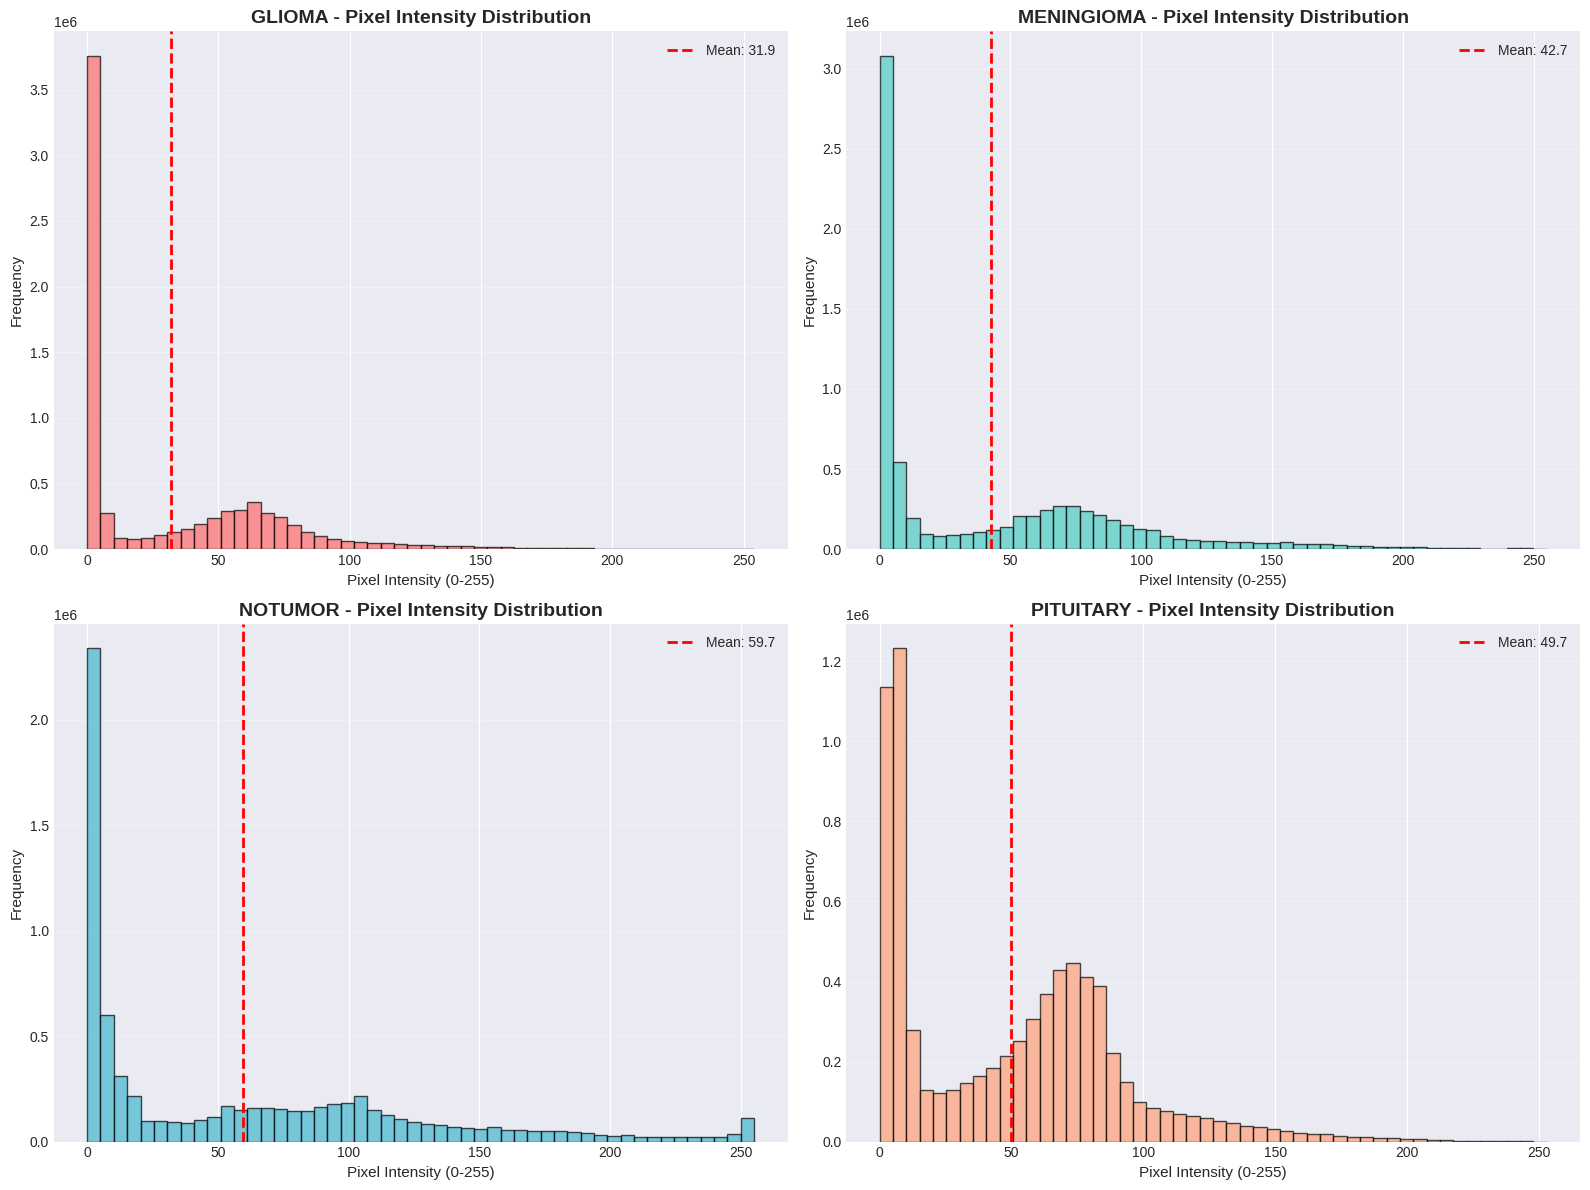

Pixel intensity distributions visualized!


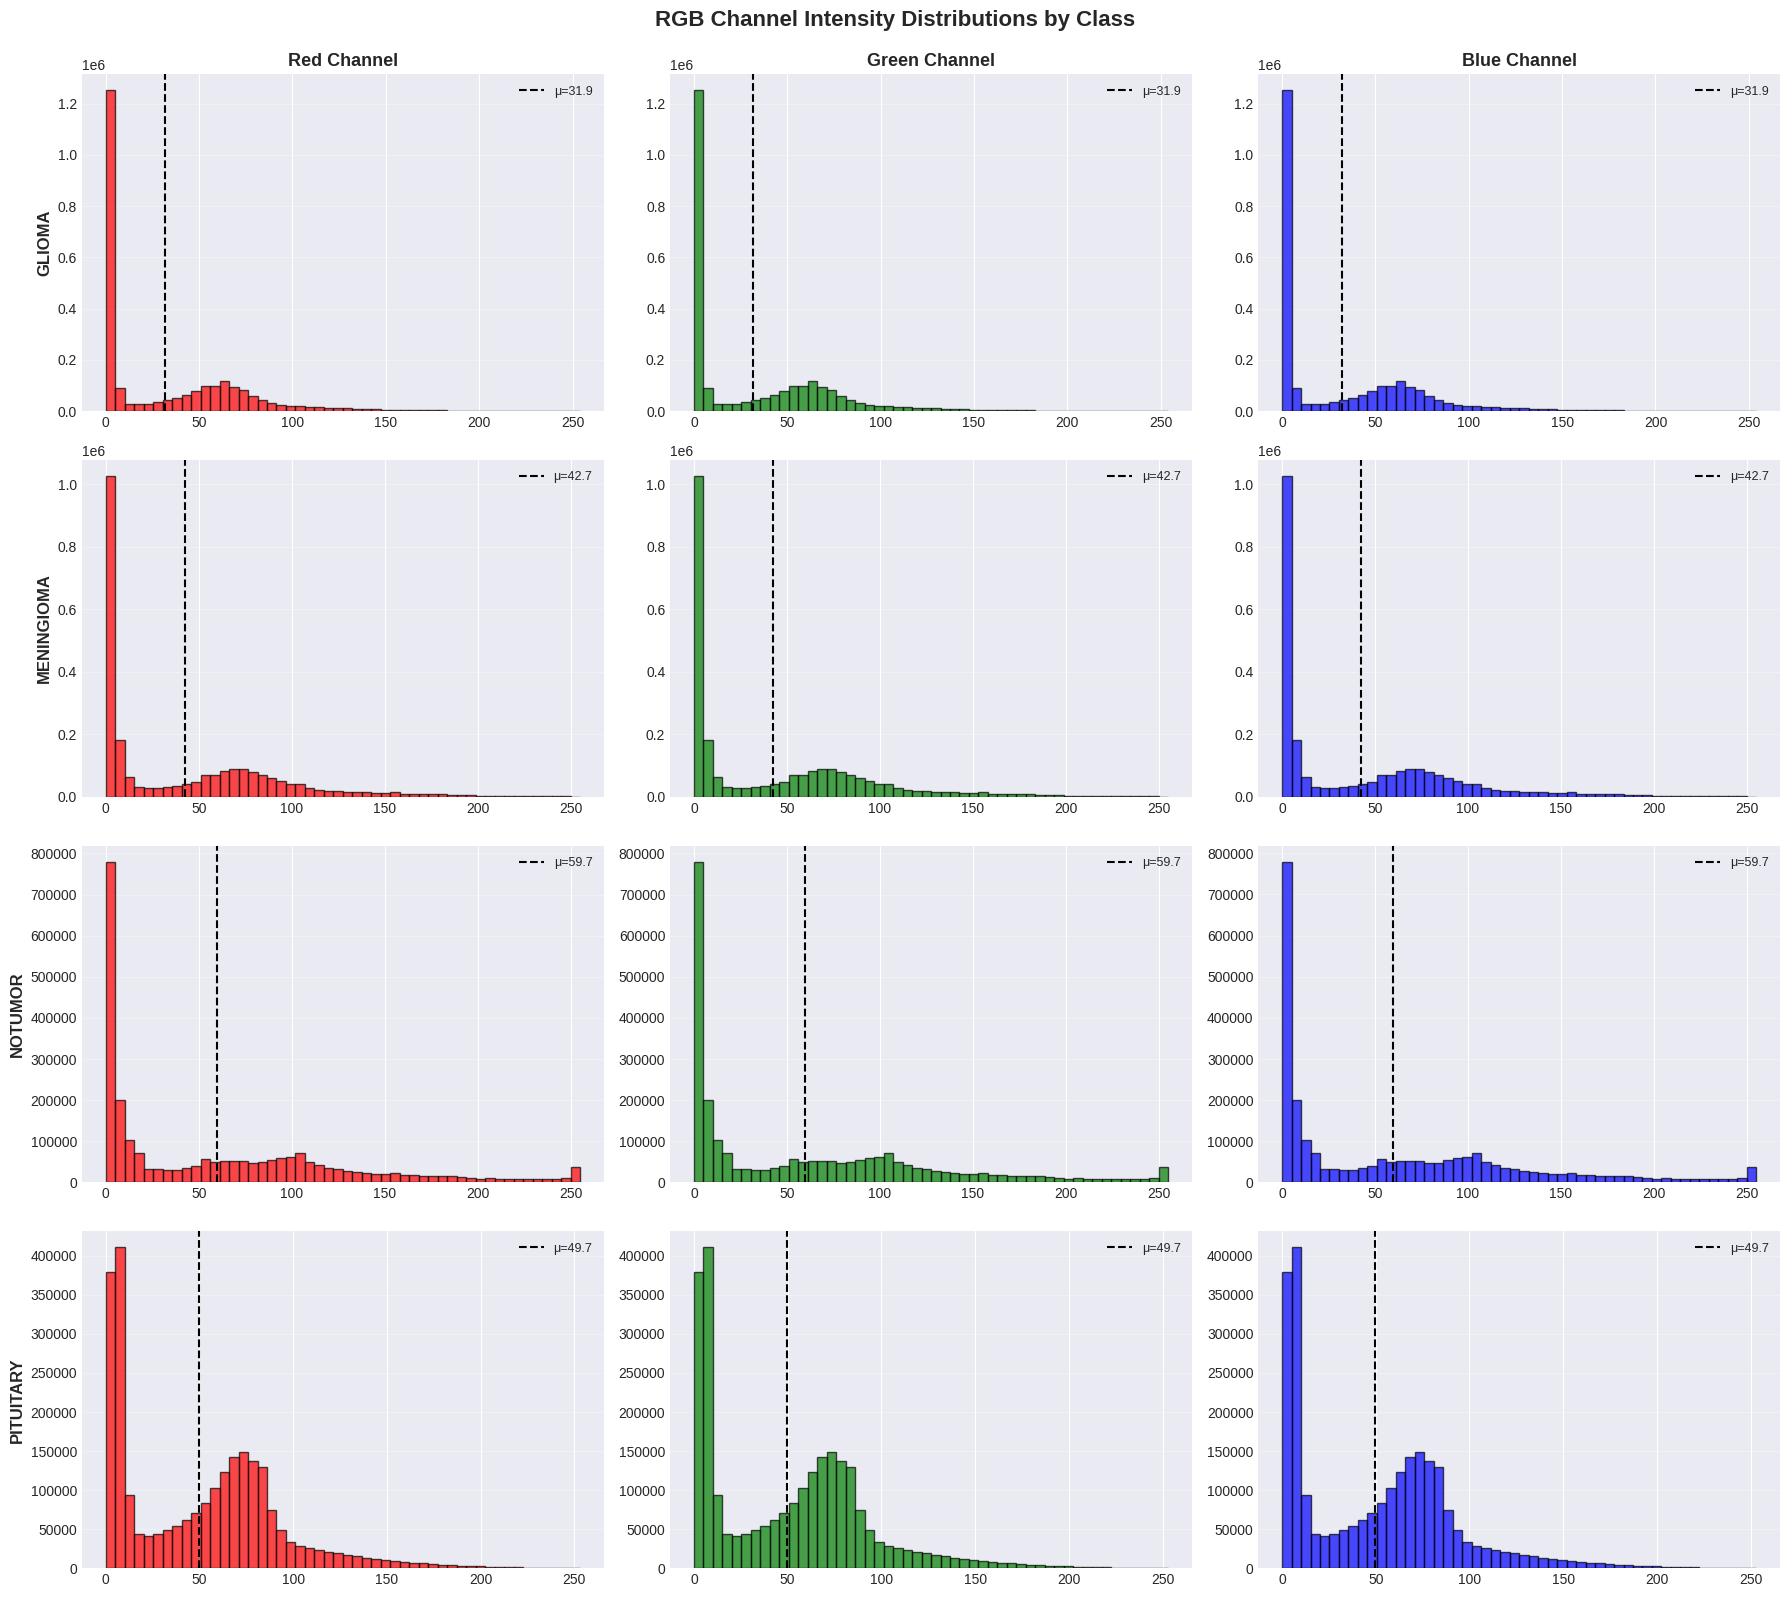

RGB channel analysis complete!


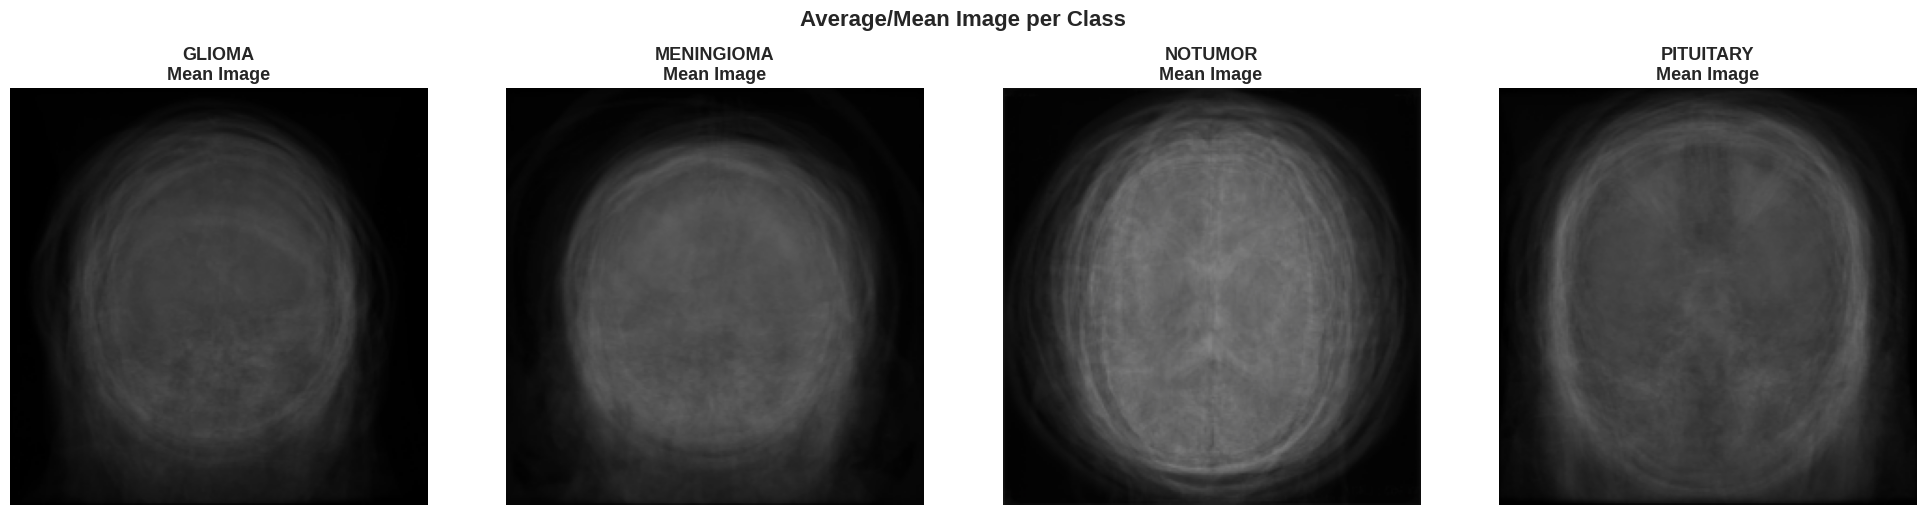

Mean images computed and visualized!


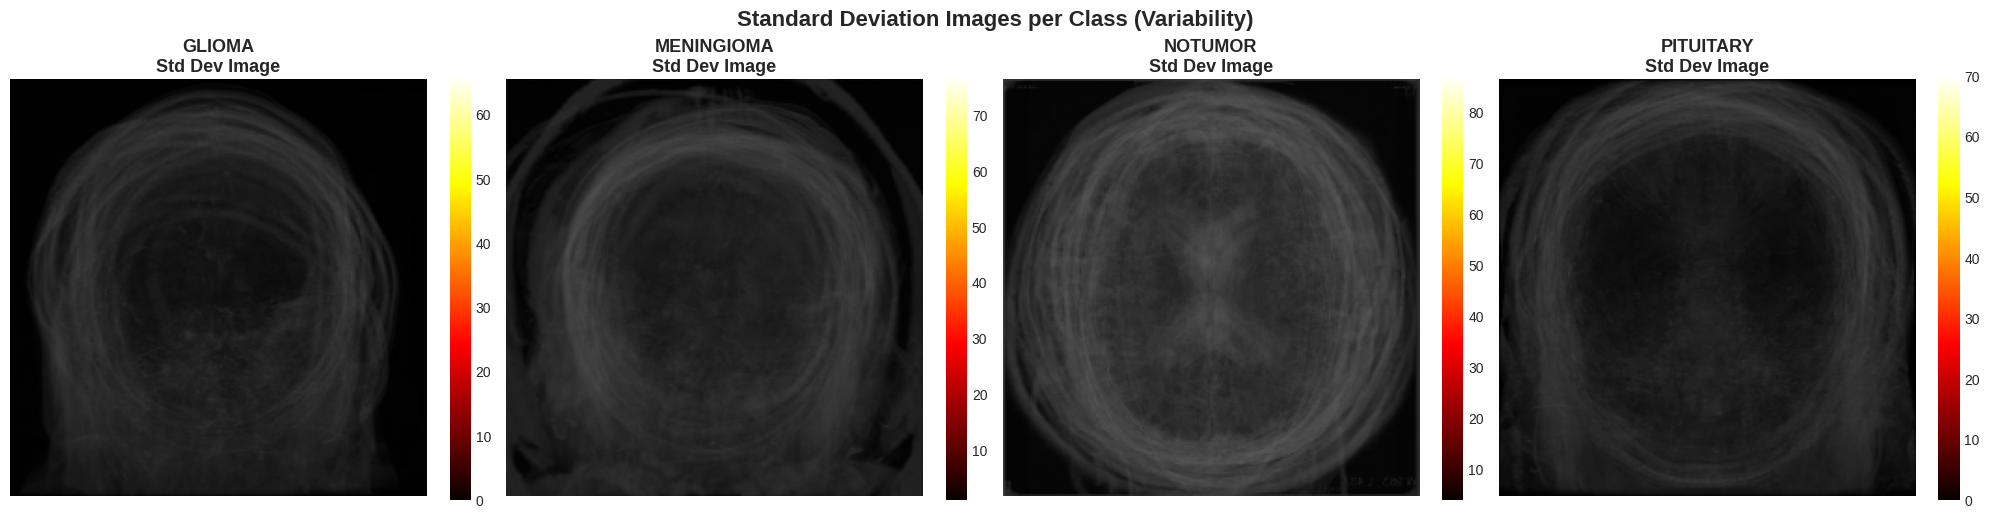

Standard deviation images computed and visualized!
Preparing data for correlation analysis...
  Data shape: (120, 150528)
  Total samples: 120
Computing class-level correlation...


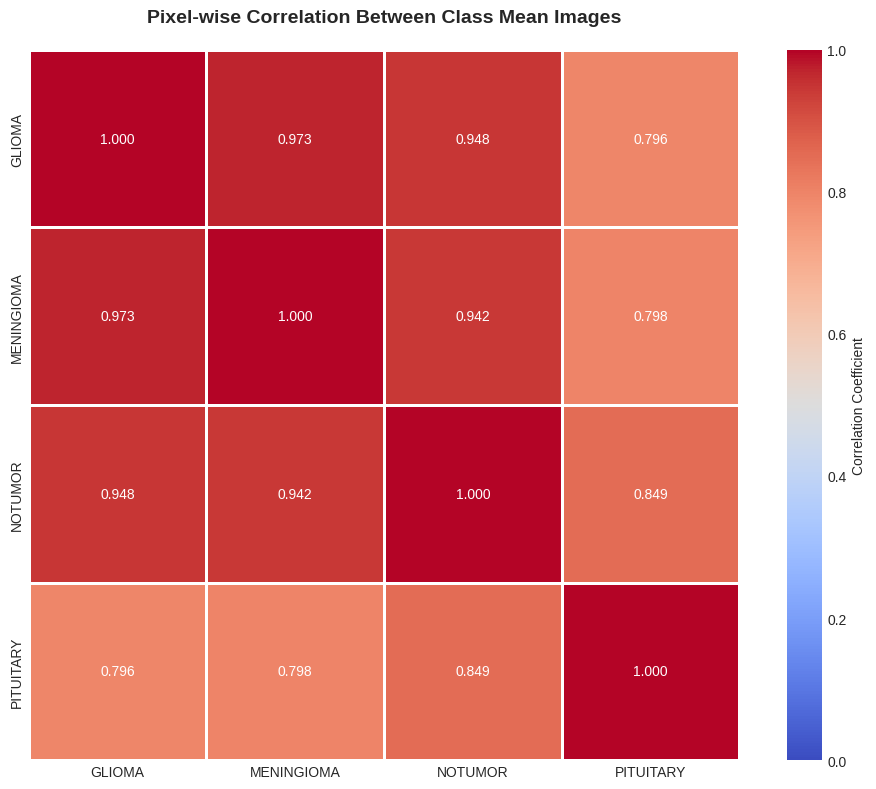

Class correlation heatmap created!

IMAGE QUALITY ANALYSIS

GLIOMA:
  Brightness:  31.87 ±  9.10
  Contrast:    37.61 ±  5.97

MENINGIOMA:
  Brightness:  42.69 ± 15.67
  Contrast:    46.24 ±  7.38

NOTUMOR:
  Brightness:  59.69 ± 19.57
  Contrast:    61.17 ± 16.60

PITUITARY:
  Brightness:  49.75 ±  6.28
  Contrast:    41.60 ±  3.75


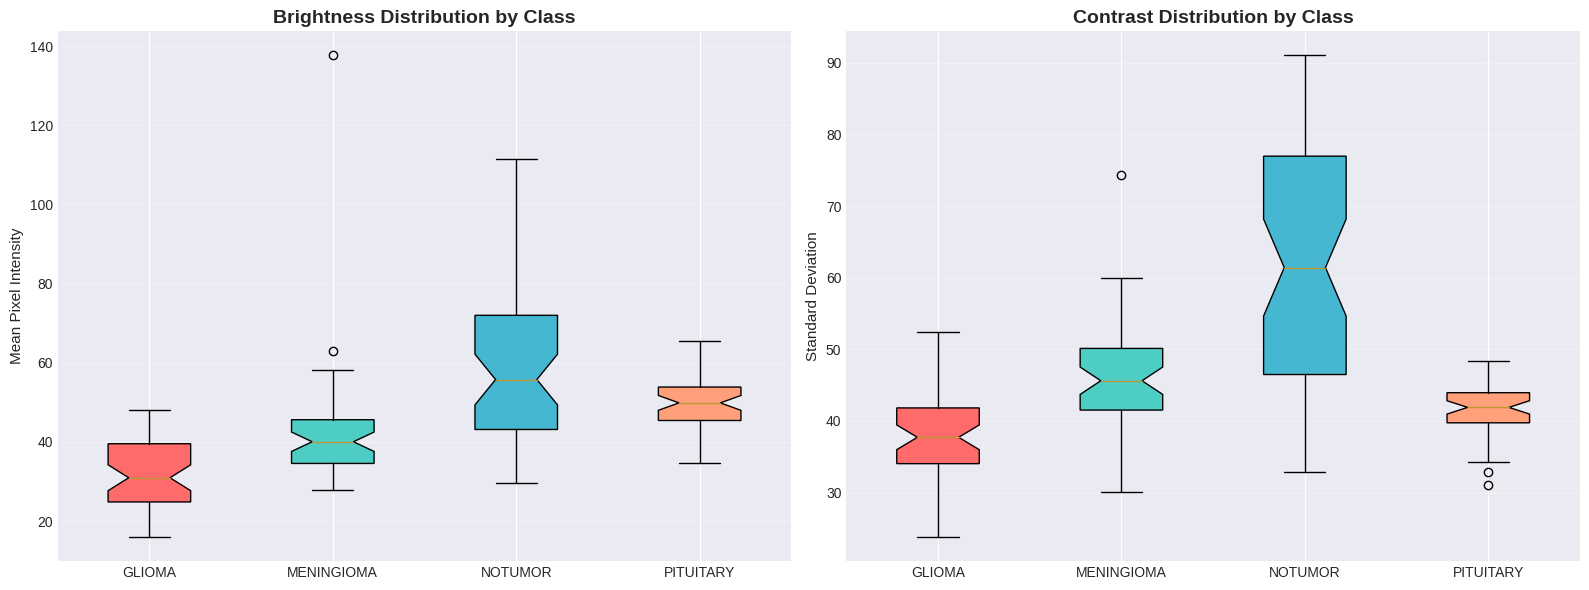

Brightness and contrast distributions visualized!


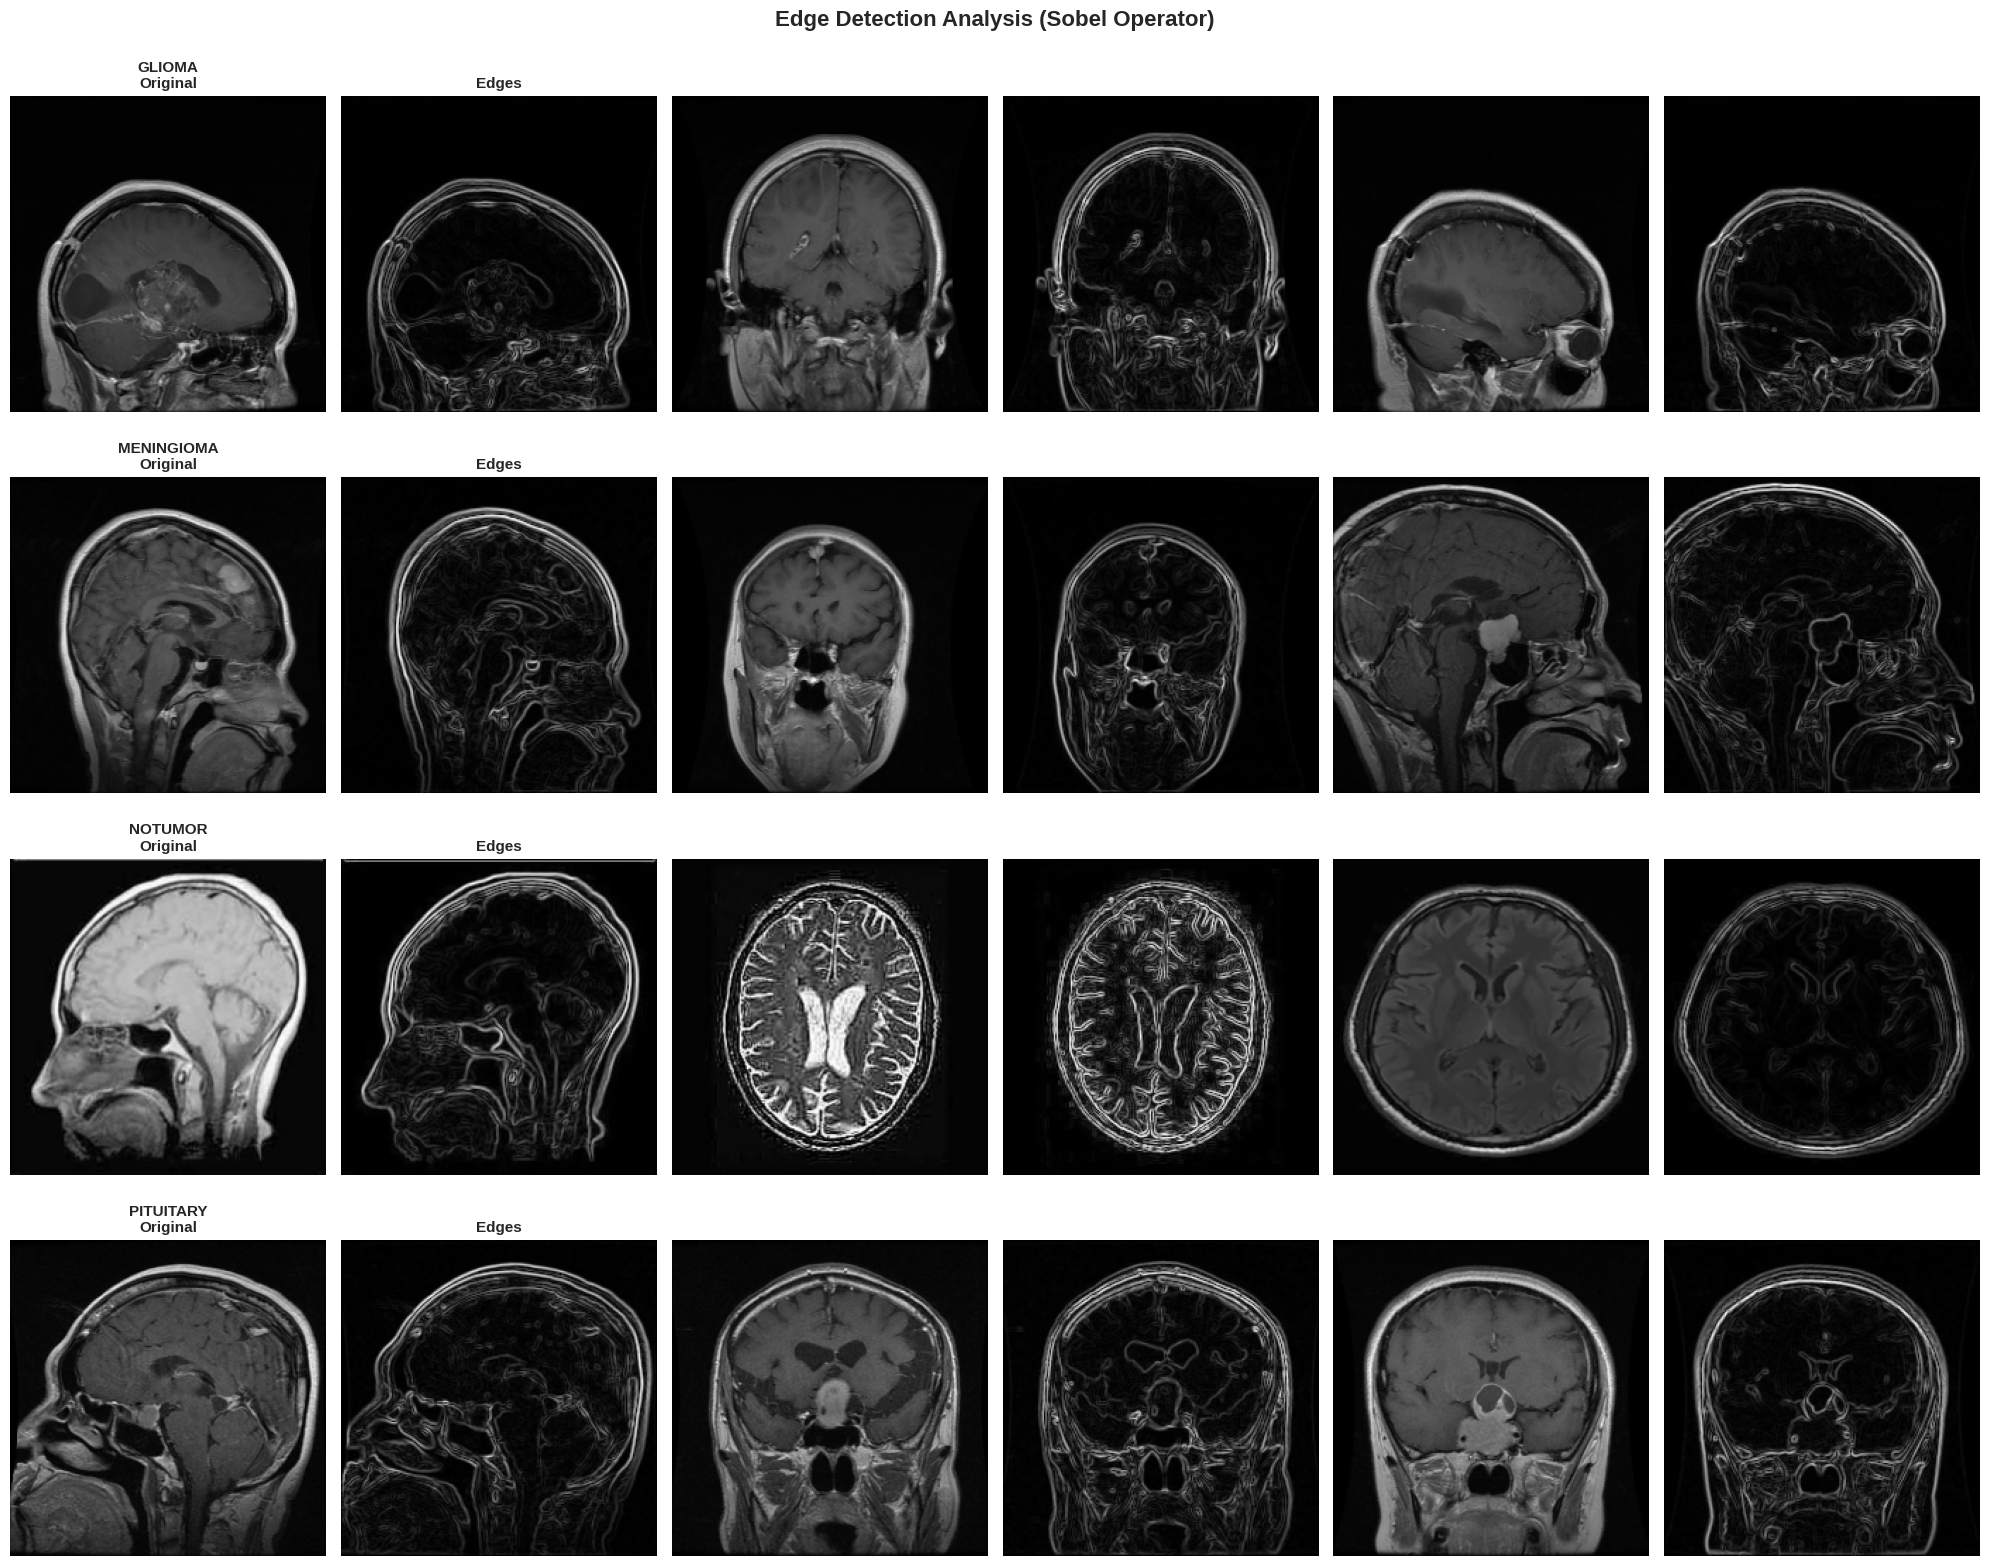

Edge detection analysis complete!

COMPREHENSIVE SUMMARY STATISTICS
     Class  Training Images  Testing Images  Mean Pixel Intensity  Std Pixel Intensity  Mean Brightness  Mean Contrast
    GLIOMA             1321             300             31.871454            39.154347        31.871454      37.610290
MENINGIOMA             1339             306             42.686077            49.378696        42.686077      46.242120
   NOTUMOR             1595             405             59.693201            66.334173        59.693201      61.171338
 PITUITARY             1457             300             49.749564            42.240767        49.749564      41.602442

EXPLORATORY DATA ANALYSIS - FINAL SUMMARY REPORT

DATASET OVERVIEW:
   • Total Training Images: 5,712
   • Total Testing Images:  1,311
   • Total Images:          7,023
   • Number of Classes:     4
   • Class Names:           GLIOMA, MENINGIOMA, NOTUMOR, PITUITARY

CLASS BALANCE:
   • Training Set Imbalance Ratio: 1.21:1
   • Status

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

def load_sample_images_for_analysis(num_samples=50):
    print("Loading images for pixel intensity analysis...")
    images_by_class = {class_name: [] for class_name in CLASS_NAMES}
        
    for class_name in CLASS_NAMES:
        class_path = os.path.join(TRAIN_PATH, class_name)
        image_files = [f for f in os.listdir(class_path)
                       if f.endswith(('.jpg', '.jpeg', '.png'))]
                
        sample_files = np.random.choice(image_files,
                                        min(num_samples, len(image_files)),
                                        replace=False)
                
        for img_file in sample_files:
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)
                        
            if img is not None:
                img_resized = cv2.resize(img, (224, 224))
                img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
                images_by_class[class_name].append(img_rgb)
        
    for class_name in CLASS_NAMES:
        images_by_class[class_name] = np.array(images_by_class[class_name])
        print(f"  {class_name:12s}: {images_by_class[class_name].shape}")
        
    return images_by_class

sample_images = load_sample_images_for_analysis(num_samples=50)

def analyze_pixel_intensities(images_by_class):
    print(f"\nPIXEL INTENSITY STATISTICS")
        
    intensity_stats = {}
        
    for class_name in CLASS_NAMES:
        images = images_by_class[class_name]
                
        mean_intensity = np.mean(images)
        std_intensity = np.std(images)
        min_intensity = np.min(images)
        max_intensity = np.max(images)
        median_intensity = np.median(images)
                
        intensity_stats[class_name] = {
            'mean': mean_intensity,
            'std': std_intensity,
            'min': min_intensity,
            'max': max_intensity,
            'median': median_intensity
        }
                
        print(f"\n{class_name.upper()}:")
        print(f"  Mean:   {mean_intensity:7.2f}")
        print(f"  Std:    {std_intensity:7.2f}")
        print(f"  Min:    {min_intensity:7.2f}")
        print(f"  Max:    {max_intensity:7.2f}")
        print(f"  Median: {median_intensity:7.2f}")
        
    return intensity_stats

intensity_stats = analyze_pixel_intensities(sample_images)


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()
colors_hist = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, class_name in enumerate(CLASS_NAMES):
    images = sample_images[class_name]
        
    pixel_values = images.flatten()
        
    axes[idx].hist(pixel_values, bins=50, color=colors_hist[idx],
                   alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'{class_name.upper()} - Pixel Intensity Distribution',
                        fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Pixel Intensity (0-255)', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].grid(axis='y', alpha=0.3)
        
    mean_val = np.mean(pixel_values)
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                     label=f'Mean: {mean_val:.1f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()
print("Pixel intensity distributions visualized!")


def analyze_rgb_channels(images_by_class): 
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))
        
    channel_names = ['Red', 'Green', 'Blue']
    channel_colors = ['red', 'green', 'blue']
        
    for class_idx, class_name in enumerate(CLASS_NAMES):
        images = sample_images[class_name]
                
        for channel_idx in range(3):
            channel_data = images[:, :, :, channel_idx].flatten()
                        
            axes[class_idx, channel_idx].hist(channel_data, bins=50,
                                               color=channel_colors[channel_idx],
                                               alpha=0.7, edgecolor='black')
                        
            if class_idx == 0:
                axes[class_idx, channel_idx].set_title(
                    f'{channel_names[channel_idx]} Channel', 
                     fontsize=13, fontweight='bold'
                )
                        
            if channel_idx == 0:
                axes[class_idx, channel_idx].set_ylabel(
                    f'{class_name.upper()}', 
                     fontsize=12, fontweight='bold'
                )
                        
            axes[class_idx, channel_idx].grid(axis='y', alpha=0.3)
                        
            mean_val = np.mean(channel_data)
            axes[class_idx, channel_idx].axvline(
                mean_val, color='black', linestyle='--', linewidth=1.5,
                label=f'μ={mean_val:.1f}'
            )
            axes[class_idx, channel_idx].legend(fontsize=9)
        
    plt.suptitle('RGB Channel Intensity Distributions by Class',
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
        
    print("RGB channel analysis complete!")

analyze_rgb_channels(sample_images)


def compute_mean_images(images_by_class):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    mean_images = {}
        
    for idx, class_name in enumerate(CLASS_NAMES):
        images = sample_images[class_name]
                
        mean_img = np.mean(images, axis=0).astype(np.uint8)
        mean_images[class_name] = mean_img
                
        axes[idx].imshow(mean_img)
        axes[idx].set_title(f'{class_name.upper()}\nMean Image',
                            fontsize=13, fontweight='bold')
        axes[idx].axis('off')
        
    plt.suptitle('Average/Mean Image per Class',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
        
    print("Mean images computed and visualized!")
    return mean_images

mean_images = compute_mean_images(sample_images)


def compute_std_images(images_by_class):   
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    std_images = {}
        
    for idx, class_name in enumerate(CLASS_NAMES):
        images = sample_images[class_name]
                
        std_img = np.std(images, axis=0).astype(np.uint8)
        std_images[class_name] = std_img
                
        im = axes[idx].imshow(std_img, cmap='hot')
        axes[idx].set_title(f'{class_name.upper()}\nStd Dev Image',
                            fontsize=13, fontweight='bold')
        axes[idx].axis('off')
        plt.colorbar(im, ax=axes[idx], fraction=0.046)
        
    plt.suptitle('Standard Deviation Images per Class (Variability)',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
        
    print("Standard deviation images computed and visualized!")
    return std_images

std_images = compute_std_images(sample_images)


def prepare_correlation_data(images_by_class, sample_size=30):   
    print("Preparing data for correlation analysis...")
    
    data_for_corr = []
    labels_for_corr = []
        
    for class_name in CLASS_NAMES:
        images = sample_images[class_name][:sample_size]
                
        for img in images:
            flattened = img.flatten()
            data_for_corr.append(flattened)
            labels_for_corr.append(class_name)
        
    data_array = np.array(data_for_corr)
        
    print(f"  Data shape: {data_array.shape}")
    print(f"  Total samples: {len(labels_for_corr)}")
        
    return data_array, labels_for_corr

corr_data, corr_labels = prepare_correlation_data(sample_images, sample_size=30)


def compute_class_correlation(images_by_class):
    print("Computing class-level correlation...")
    
    class_mean_vectors = {}
        
    for class_name in CLASS_NAMES:
        images = sample_images[class_name]
        mean_img = np.mean(images, axis=0)
        class_mean_vectors[class_name] = mean_img.flatten()
        
    correlation_matrix = np.zeros((len(CLASS_NAMES), len(CLASS_NAMES)))
        
    for i, class1 in enumerate(CLASS_NAMES):
        for j, class2 in enumerate(CLASS_NAMES):
            vec1 = class_mean_vectors[class1]
            vec2 = class_mean_vectors[class2]
            correlation = np.corrcoef(vec1, vec2)[0, 1]
            correlation_matrix[i, j] = correlation
        
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix,
                 annot=True,
                 fmt='.3f',
                xticklabels=[c.upper() for c in CLASS_NAMES],
                yticklabels=[c.upper() for c in CLASS_NAMES],
                cmap='coolwarm',
                center=0.5,
                vmin=0, vmax=1,
                square=True,
                linewidths=2,
                cbar_kws={'label': 'Correlation Coefficient'})
        
    plt.title('Pixel-wise Correlation Between Class Mean Images',
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
        
    print("Class correlation heatmap created!")
        
    return correlation_matrix

correlation_matrix = compute_class_correlation(sample_images)


def analyze_image_quality(images_by_class):   
    print(f"\nIMAGE QUALITY ANALYSIS")
        
    quality_stats = {}
        
    for class_name in CLASS_NAMES:
        images = sample_images[class_name]
                
        brightness_values = []
        contrast_values = []
                
        for img in images:
            brightness = np.mean(img)
            brightness_values.append(brightness)
                        
            contrast = np.std(img)
            contrast_values.append(contrast)
                
        quality_stats[class_name] = {
            'brightness_mean': np.mean(brightness_values),
            'brightness_std': np.std(brightness_values),
            'contrast_mean': np.mean(contrast_values),
            'contrast_std': np.std(contrast_values)
        }
                
        print(f"\n{class_name.upper()}:")
        print(f"  Brightness: {np.mean(brightness_values):6.2f} ± {np.std(brightness_values):5.2f}")
        print(f"  Contrast:   {np.mean(contrast_values):6.2f} ± {np.std(contrast_values):5.2f}")
        
    return quality_stats

quality_stats = analyze_image_quality(sample_images)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

brightness_data = {class_name: [] for class_name in CLASS_NAMES}
contrast_data = {class_name: [] for class_name in CLASS_NAMES}
for class_name in CLASS_NAMES:
    images = sample_images[class_name]
    for img in images:
        brightness_data[class_name].append(np.mean(img))
        contrast_data[class_name].append(np.std(img))

brightness_list = [brightness_data[cn] for cn in CLASS_NAMES]
bp1 = axes[0].boxplot(brightness_list, labels=[cn.upper() for cn in CLASS_NAMES],
                      patch_artist=True, notch=True)
for patch, color in zip(bp1['boxes'], ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']):
    patch.set_facecolor(color)
axes[0].set_title('Brightness Distribution by Class', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Mean Pixel Intensity', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

contrast_list = [contrast_data[cn] for cn in CLASS_NAMES]
bp2 = axes[1].boxplot(contrast_list, labels=[cn.upper() for cn in CLASS_NAMES],
                      patch_artist=True, notch=True)
for patch, color in zip(bp2['boxes'], ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']):
    patch.set_facecolor(color)
axes[1].set_title('Contrast Distribution by Class', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Standard Deviation', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
print("Brightness and contrast distributions visualized!")


def analyze_edges(num_samples=3):   
    fig, axes = plt.subplots(4, num_samples*2, figsize=(20, 16))
        
    for class_idx, class_name in enumerate(CLASS_NAMES):
        images = sample_images[class_name][:num_samples]
                
        for img_idx, img in enumerate(images):
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                        
            sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
            sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
            sobel_combined = np.sqrt(sobelx**2 + sobely**2)
                        
            axes[class_idx, img_idx*2].imshow(img)
            axes[class_idx, img_idx*2].axis('off')
            if img_idx == 0:
                axes[class_idx, img_idx*2].set_title(
                    f'{class_name.upper()}\nOriginal', 
                     fontsize=11, fontweight='bold'
                )
                        
            axes[class_idx, img_idx*2+1].imshow(sobel_combined, cmap='gray')
            axes[class_idx, img_idx*2+1].axis('off')
            if img_idx == 0:
                axes[class_idx, img_idx*2+1].set_title('Edges', fontsize=11, fontweight='bold')
        
    plt.suptitle('Edge Detection Analysis (Sobel Operator)',
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
        
    print("Edge detection analysis complete!")

analyze_edges(num_samples=3)


def create_summary_statistics():   
    summary_data = []
        
    for class_name in CLASS_NAMES:
        images = sample_images[class_name]
                
        row = {
            'Class': class_name.upper(),
            'Training Images': train_counts[class_name],
            'Testing Images': test_counts[class_name],
            'Mean Pixel Intensity': intensity_stats[class_name]['mean'],
            'Std Pixel Intensity': intensity_stats[class_name]['std'],
            'Mean Brightness': quality_stats[class_name]['brightness_mean'],
            'Mean Contrast': quality_stats[class_name]['contrast_mean']
        }
        summary_data.append(row)
        
    summary_df = pd.DataFrame(summary_data)
        
    print("\nCOMPREHENSIVE SUMMARY STATISTICS")
    print(summary_df.to_string(index=False))
        
    return summary_df

summary_statistics_df = create_summary_statistics()


print("\nEXPLORATORY DATA ANALYSIS - FINAL SUMMARY REPORT")

total_train = sum(train_counts.values())
total_test = sum(test_counts.values())
total_images = total_train + total_test

print(f"\nDATASET OVERVIEW:")
print(f"   • Total Training Images: {total_train:,}")
print(f"   • Total Testing Images:  {total_test:,}")
print(f"   • Total Images:          {total_images:,}")
print(f"   • Number of Classes:     {len(CLASS_NAMES)}")
print(f"   • Class Names:           {', '.join([c.upper() for c in CLASS_NAMES])}")

print(f"\nCLASS BALANCE:")
train_imbalance = max(train_counts.values()) / min(train_counts.values())
print(f"   • Training Set Imbalance Ratio: {train_imbalance:.2f}:1")
if train_imbalance < 1.5:
    print(f"   • Status: BALANCED")
else:
    print(f"   • Status: NEEDS ATTENTION")

print(f"\nIMAGE CHARACTERISTICS:")
all_widths = []
all_heights = []
for class_name in CLASS_NAMES:
    all_widths.extend(dimensions_data[class_name]['widths'])
    all_heights.extend(dimensions_data[class_name]['heights'])
print(f"   • Width Range:  {min(all_widths)} - {max(all_widths)} pixels")
print(f"   • Height Range: {min(all_heights)} - {max(all_heights)} pixels")
print(f"   • Recommended Resize: 224x224 or 256x256 pixels")

print(f"\nPIXEL INTENSITY:")
mean_intensities = [intensity_stats[cn]['mean'] for cn in CLASS_NAMES]
print(f"   • Overall Mean: {np.mean(mean_intensities):.2f}")
print(f"   • Range: {min(mean_intensities):.2f} - {max(mean_intensities):.2f}")

print("\nEDA COMPLETE! Ready for model building.")

Setup complete!
Class Weights:
   glioma      : 1.0810
   meningioma  : 1.0665
   notumor     : 0.8953
   pituitary   : 0.9801
Generators created!
   Train batches: 179
   Test batches:  41


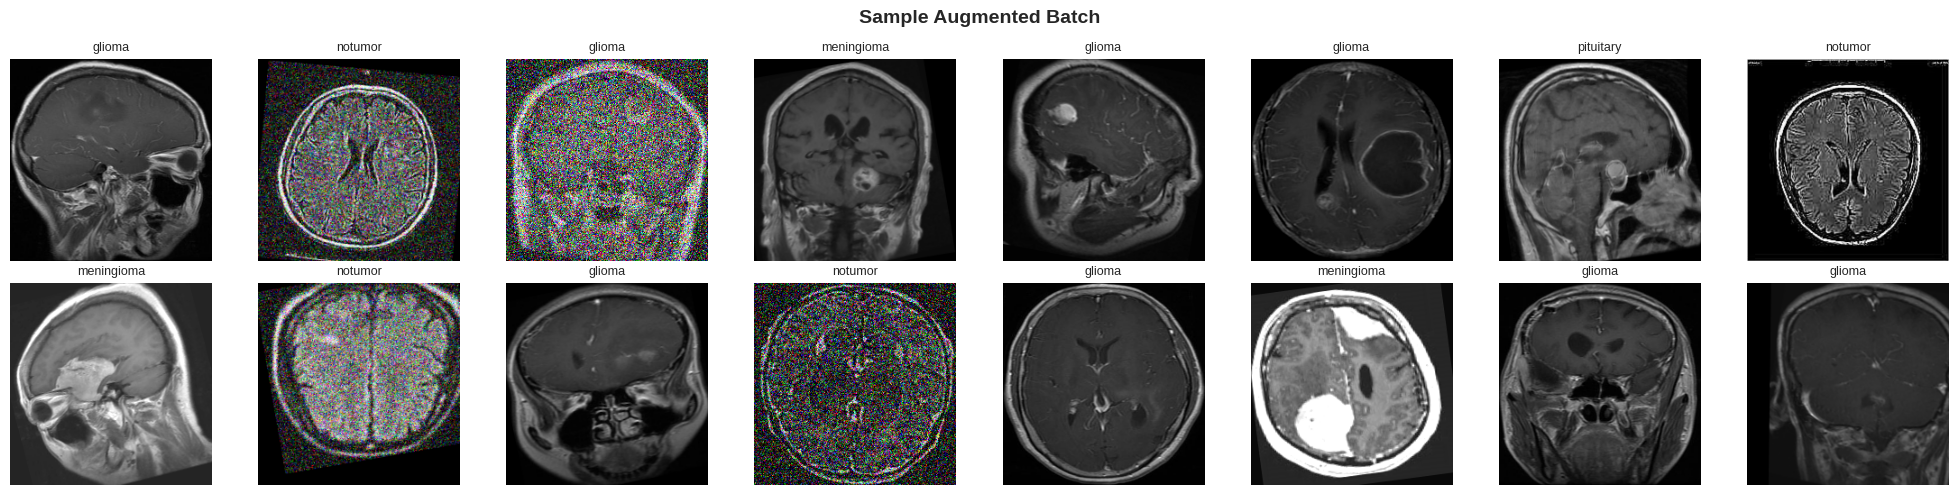

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
 Keras generators created!
   Train samples: 4857
   Val samples:   855
   Test samples:  1311


In [13]:
!pip install -q albumentations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import albumentations as A
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import gc

BASE_PATH = '/kaggle/input/brain-tumor-mri-dataset'
TRAIN_PATH = os.path.join(BASE_PATH, 'Training')
TEST_PATH = os.path.join(BASE_PATH, 'Testing')
CLASS_NAMES = ['glioma', 'meningioma', 'notumor', 'pituitary']
IMG_SIZE = 224
BATCH_SIZE = 32

print("Setup complete!")

def crop_brain(image, threshold=10):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        return image[y:y+h, x:x+w]
    return image

def count_classes(base_path, class_names):
    labels = []
    for idx, cn in enumerate(class_names):
        count = len(os.listdir(os.path.join(base_path, cn)))
        labels.extend([idx] * count)
    return np.array(labels)

y_train_labels = count_classes(TRAIN_PATH, CLASS_NAMES)
class_weights_array = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights = {i: class_weights_array[i] for i in range(len(CLASS_NAMES))}

print("Class Weights:")
for i, cn in enumerate(CLASS_NAMES):
    print(f"   {cn:12s}: {class_weights[i]:.4f}")

train_transform = A.Compose([
    A.Rotate(limit=15, p=0.6),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.GaussNoise(var_limit=(10.0, 30.0), p=0.3),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=0.5),
])

class BrainTumorDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, base_path, class_names, batch_size=32, img_size=224,
                 shuffle=True, augment=False, transform=None):
        self.base_path = base_path
        self.class_names = class_names
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.augment = augment
        self.transform = transform
                
        # Get all file paths and labels
        self.file_paths = []
        self.labels = []
        for label_idx, cn in enumerate(class_names):
            class_path = os.path.join(base_path, cn)
            files = [os.path.join(class_path, f) for f in os.listdir(class_path)
                     if f.endswith(('.jpg', '.png', '.jpeg'))]
            self.file_paths.extend(files)
            self.labels.extend([label_idx] * len(files))
                
        self.indexes = np.arange(len(self.file_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)
            
    def __len__(self):
        return int(np.ceil(len(self.file_paths) / self.batch_size))
        
    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
                
        X_batch = []
        y_batch = []
                
        for idx in batch_indexes:
            img_path = self.file_paths[idx]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        
            # Crop and resize
            img = crop_brain(img)
            img = cv2.resize(img, (self.img_size, self.img_size))
                        
            # Augment if training
            if self.augment and self.transform:
                img = self.transform(image=img)['image']
                        
            # Normalize
            img = img.astype('float32') / 255.0
                        
            X_batch.append(img)
            y_batch.append(self.labels[idx])
                
        return np.array(X_batch), np.array(y_batch)
        
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

train_gen = BrainTumorDataGenerator(
    TRAIN_PATH, CLASS_NAMES, batch_size=BATCH_SIZE, 
    shuffle=True, augment=True, transform=train_transform)

val_gen = BrainTumorDataGenerator(
    TRAIN_PATH, CLASS_NAMES, batch_size=BATCH_SIZE, 
    shuffle=False, augment=False)

test_gen = BrainTumorDataGenerator(
    TEST_PATH, CLASS_NAMES, batch_size=BATCH_SIZE, 
    shuffle=False, augment=False)

print(f"Generators created!")
print(f"   Train batches: {len(train_gen)}")
print(f"   Test batches:  {len(test_gen)}")

sample_batch_X, sample_batch_y = train_gen[0]
fig, axes = plt.subplots(2, 8, figsize=(20, 5))
for i in range(16):
    ax = axes[i//8, i%8]
    ax.imshow(sample_batch_X[i])
    ax.set_title(CLASS_NAMES[sample_batch_y[i]], fontsize=9)
    ax.axis('off')
plt.suptitle('Sample Augmented Batch', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.15,
    preprocessing_function=lambda x: cv2.resize(crop_brain(x), (IMG_SIZE, IMG_SIZE)).astype(np.float32) / 255.0
)

test_datagen = ImageDataGenerator(
    preprocessing_function=lambda x: cv2.resize(crop_brain(x), (IMG_SIZE, IMG_SIZE)).astype(np.float32) / 255.0
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False
)

print(f" Keras generators created!")
print(f"   Train samples: {train_generator.n}")
print(f"   Val samples:   {val_generator.n}")
print(f"   Test samples:  {test_generator.n}")

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dense, Dropout,
                                     Flatten, BatchNormalization, GlobalAveragePooling2D,
                                     Input, Activation)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau,
                                        ModelCheckpoint, TensorBoard)
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import json

In [15]:
def build_cnn_baseline(input_shape=(224, 224, 3), num_classes=4):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ], name='CNN_Baseline')
    
    return model

model_cnn = build_cnn_baseline()
model_cnn.summary()

model_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled!")

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'cnn_baseline_best.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]
print("Callbacks configured!")


Model: "CNN_Baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 27,002,148 (103.01 MB)

 Trainable params: 26,998,692 (102.99 MB)

 Non-trainable params: 3,456 (13.50 KB)

Model compiled!
Callbacks configured!


In [17]:
EPOCHS = 50
history = model_cnn.fit(
    train_gen,                   
    validation_data=val_gen,       
    epochs=EPOCHS,
    class_weight=class_weights,  
    callbacks=callbacks,
    verbose=1
)

print("✅ Training complete!")

Epoch 1/50


I0000 00:00:1762472397.877625     147 service.cc:148] XLA service 0x7bef54003ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762472397.880185     147 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762472397.880208     147 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762472398.989427     147 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1762472419.146794     147 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.3586 - loss: 1.9650
Epoch 1: val_accuracy improved from -inf to 0.23127, saving model to cnn_baseline_best.h5
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 610ms/step - accuracy: 0.3589 - loss: 1.9636 - val_accuracy: 0.2313 - val_loss: 2.3165 - learning_rate: 0.0010
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.4945 - loss: 1.2842
Epoch 2: val_accuracy improved from 0.23127 to 0.34629, saving model to cnn_baseline_best.h5
179/179 ━━━━━━━━━━━━━━━━━━━━ 63s 354ms/step - accuracy: 0.4946 - loss: 1.2837 - val_accuracy: 0.3463 - val_loss: 1.6413 - learning_rate: 0.0010
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.5652 - loss: 1.0435
Epoch 3: val_accuracy improved from 0.34629 to 0.65389, saving model to cnn_baseline_best.h5
179/179 ━━━━━━━━━━━━━━━━━━━━ 67s 375ms/step - accuracy: 0.5653 - loss: 1.0433 - val_accuracy: 0.6539 - val_loss: 0.7662 - learning_rate: 0.0010
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━

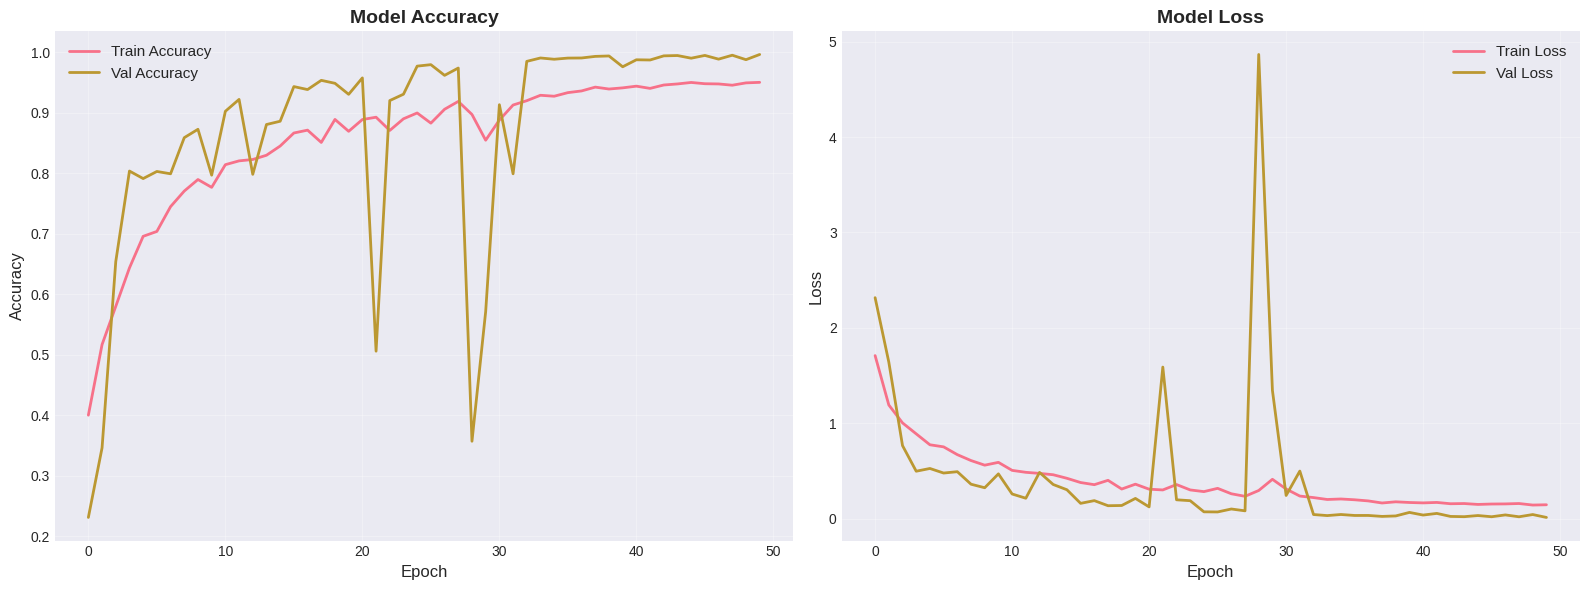

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import json

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
test_loss, test_accuracy = model_cnn.evaluate(test_gen, verbose=1)
print(f"TEST SET RESULTS - CNN BASELINE")
print(f"Test Loss:     {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.9758 - loss: 0.0737
TEST SET RESULTS - CNN BASELINE
Test Loss:     0.0481
Test Accuracy: 0.9855 (98.55%)


In [23]:
y_pred_probs = model_cnn.predict(test_gen, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true_list = test_gen.labels 
y_true_list = y_true_list[:len(y_pred)]
y_true = np.array(y_true_list) 

print(f"  Predictions generated!")
print(f"   Predictions shape: {y_pred.shape}")
print(f"   True labels shape: {y_true.shape}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step
  Predictions generated!
   Predictions shape: (1311,)
   True labels shape: (1311,)



CLASSIFICATION REPORT
              precision    recall  f1-score   support

      glioma     0.9932    0.9700    0.9815       300
  meningioma     0.9738    0.9706    0.9722       306
     notumor     0.9902    1.0000    0.9951       405
   pituitary     0.9836    0.9967    0.9901       300

    accuracy                         0.9855      1311
   macro avg     0.9852    0.9843    0.9847      1311
weighted avg     0.9855    0.9855    0.9855      1311



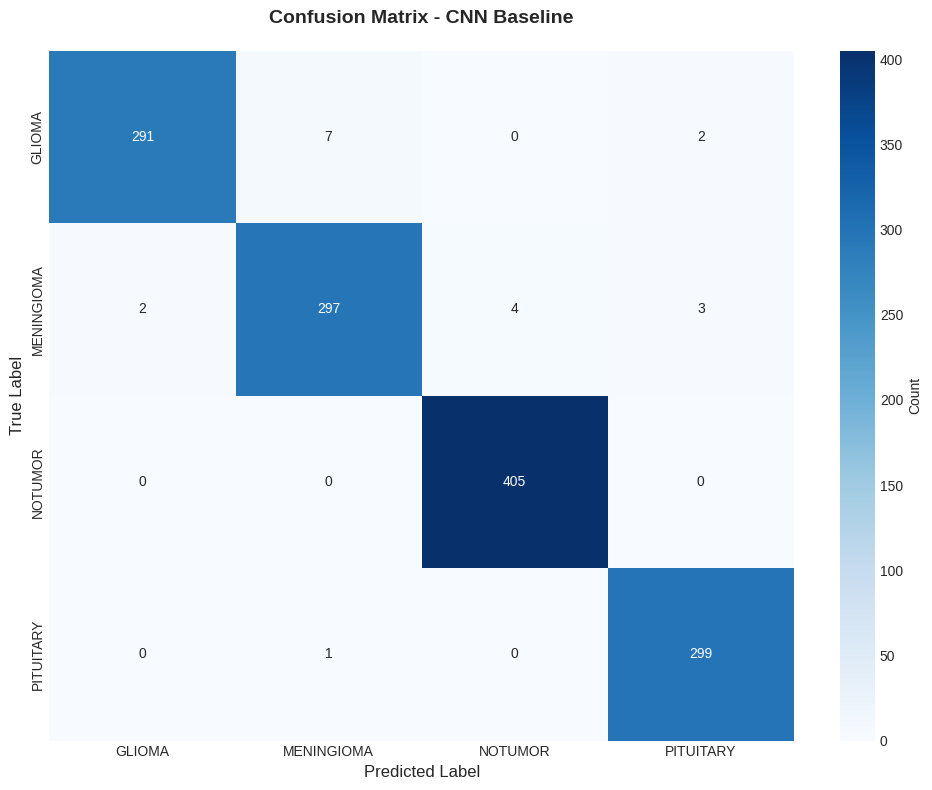

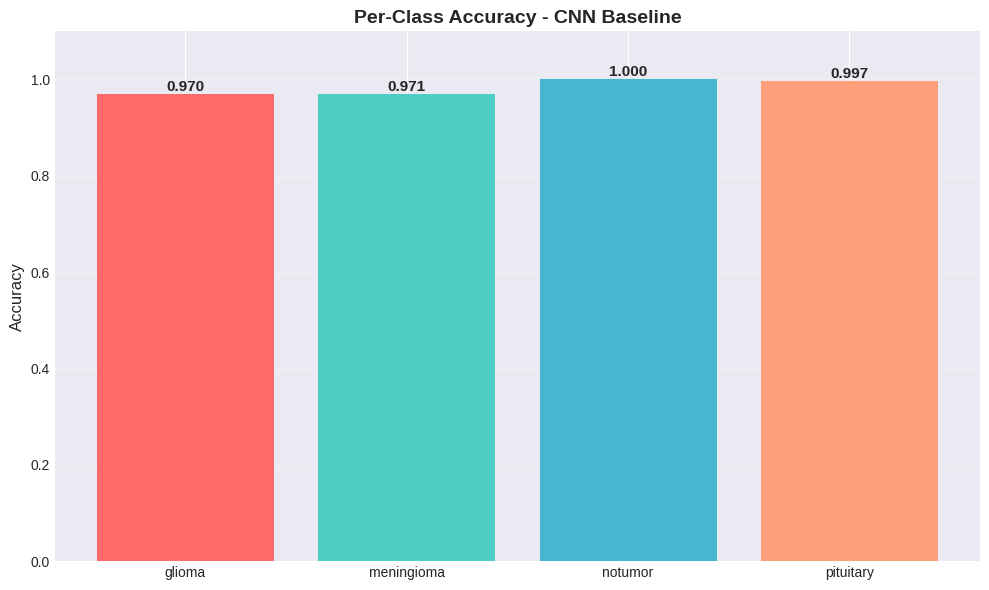


Per-Class Accuracy:
   glioma      : 0.9700 (97.00%)
   meningioma  : 0.9706 (97.06%)
   notumor     : 1.0000 (100.00%)
   pituitary   : 0.9967 (99.67%)
Model and results saved!

CNN BASELINE MODEL - FINAL SUMMARY
Architecture:      4 Conv Blocks + 2 Dense Layers
Total Parameters:  27,002,148
Training Samples:  4857
Validation Samples: 855
Test Samples:      1311
Epochs Trained:    50
Best Val Accuracy: 0.9961
Test Accuracy:     0.9855
Test Loss:         0.0481


In [24]:
print("\nCLASSIFICATION REPORT")
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES, digits=4))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[c.upper() for c in CLASS_NAMES],
            yticklabels=[c.upper() for c in CLASS_NAMES],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - CNN Baseline', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(10, 6))
bars = plt.bar(CLASS_NAMES, per_class_accuracy, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
plt.title('Per-Class Accuracy - CNN Baseline', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([0, 1.1])
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nPer-Class Accuracy:")
for cn, acc in zip(CLASS_NAMES, per_class_accuracy):
    print(f"   {cn:12s}: {acc:.4f} ({acc*100:.2f}%)")

model_cnn.save('cnn_baseline_final.h5')

results = {
    'model_name': 'CNN_Baseline',
    'test_accuracy': test_accuracy,
    'test_loss': test_loss,
    'per_class_accuracy': dict(zip(CLASS_NAMES, per_class_accuracy)),
    'confusion_matrix': cm.tolist()
}

with open('cnn_baseline_results.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Model and results saved!")

print("\nCNN BASELINE MODEL - FINAL SUMMARY")
print(f"Architecture:      4 Conv Blocks + 2 Dense Layers")
print(f"Total Parameters:  {model_cnn.count_params():,}")
print(f"Training Samples:  {train_generator.n}")
print(f"Validation Samples: {val_generator.n}")
print(f"Test Samples:      {test_generator.n}")
print(f"Epochs Trained:    {len(history.history['loss'])}")
print(f"Best Val Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"Test Accuracy:     {test_accuracy:.4f}")
print(f"Test Loss:         {test_loss:.4f}")